Testing MSE: 5633.068155793259
Testing MAE: 48.06880134700478
Testing R^2: 0.8893455830696774


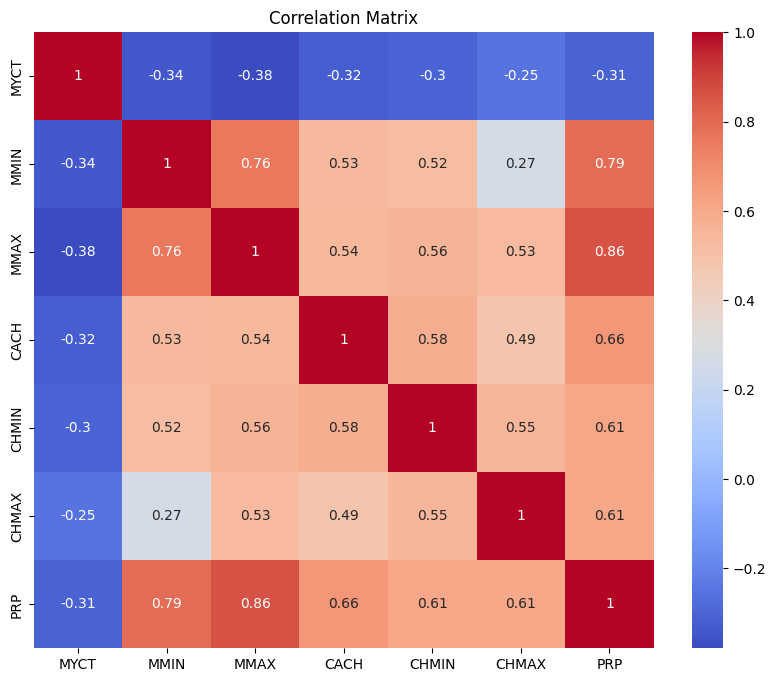

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv("machine.data.csv")

# 결측값 제거
data.dropna(inplace=True)

# 사용할 특성 선택
features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]

# 데이터셋 준비
X = data[features[:-1]]  # 독립 변수 (마지막 열 제외)
y = data["PRP"]  # 종속 변수 (PRP)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 전처리 파이프라인 설정
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # 수치형 데이터 표준화
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features[:-1])  # 수치형 특성에 대한 전처리 파이프라인 설정
    ]
)

# 모델 정의 및 파이프라인 설정
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # 전처리 파이프라인 적용
    ('regressor', LinearRegression())  # 선형 회귀 모델
])

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 성능 지표 출력
print(f"Testing MSE: {mse}")
print(f"Testing MAE: {mae}")
print(f"Testing R^2: {r2}")

# 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
